<h1>Task 3: Heart Disease Prediction<h1>

Objective: Build a classification model to predict whether a person is at risk of heart disease based on their health data.

Intern: Muhammad Hasan Waqar  
Date: 22/6/25

<h1>Step 1: Library Imports and Setup<h1>

We begin by importing all the necessary libraries for data manipulation (pandas, numpy), visualization (matplotlib, seaborn), and machine learning (sklearn). Setting a consistent plot style ensures our visuals are clean and readable.

In [1]:
# Import all necessary libraries for the entire task
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, classification_report

# Set a consistent plot style
sns.set_theme(style="whitegrid")

<h1>Step 2: Data Loading and Preprocessing<h1>


This is the most critical phase. We load the raw CSV file and perform a series of cleaning and transformation steps to prepare it for modeling. This includes:


1.   Handling non-standard missing values (e.g., '?').

2.   Dropping non-predictive or corrupted columns (id, dataset, and those found to be empty).

3.   Preparing the target variable (num) by renaming it and converting it to a binary (0 or 1) format.

4.   Separating features into numerical and categorical types.

5.   Imputing missing values: using the median for numerical columns and the
mode for categorical ones.

6.   Performing one-hot encoding on categorical features to convert them into a machine-readable format.



In [2]:

df = pd.read_csv('heart_disease_uci.csv')
df.replace('?', np.nan, inplace=True)

# Drop unusable/non-predictive columns
columns_to_drop = ['id', 'dataset', 'restecg', 'slope', 'thal']
df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

df.rename(columns={'num': 'target'}, inplace=True)
df['target'] = df['target'].apply(lambda x: 1 if x > 0 else 0)


# We explicitly define which columns are which type. This is robust.
numerical_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'ca']
categorical_cols = ['sex', 'cp', 'fbs', 'exang']


# Convert them to numeric and fill NaNs with the median.
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    df[col].fillna(df[col].median(), inplace=True)


# Fill any NaNs with the mode (most frequent value).
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)


# Final cleanup and one-hot encoding
df.dropna(inplace=True) # Safety drop for any remaining NaNs
df.reset_index(drop=True, inplace=True)
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)


# --- FINAL VERIFICATION ---
print("--- FINAL DATAFRAME STATE ---")
print(f"Final Shape: {df.shape}")
print(f"Total NaNs: {df.isnull().sum().sum()}")
print("\n--- First 5 Rows ---")
print(df.head())

--- FINAL DATAFRAME STATE ---
Final Shape: (920, 13)
Total NaNs: 0

--- First 5 Rows ---
   age  trestbps   chol  thalch  oldpeak   ca  target  sex_Male  \
0   63     145.0  233.0   150.0      2.3  0.0       0      True   
1   67     160.0  286.0   108.0      1.5  3.0       1      True   
2   67     120.0  229.0   129.0      2.6  2.0       1      True   
3   37     130.0  250.0   187.0      3.5  0.0       0      True   
4   41     130.0  204.0   172.0      1.4  0.0       0     False   

   cp_atypical angina  cp_non-anginal  cp_typical angina  fbs_True  exang_True  
0               False           False               True      True       False  
1               False           False              False     False        True  
2               False           False              False     False        True  
3               False            True              False     False       False  
4                True           False              False     False       False  


/tmp/ipython-input-2-2579293265.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/tmp/ipython-input-2-2579293265.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

<h1>Step 3: Exploratory Data Analysis (EDA)<h1>

With a clean dataset, we can now perform EDA to gain insights. We will visualize:  


*   The distribution of the target variable to check for class imbalance.  

*   The correlation of each feature with the target variable to identify potentially strong predictors.





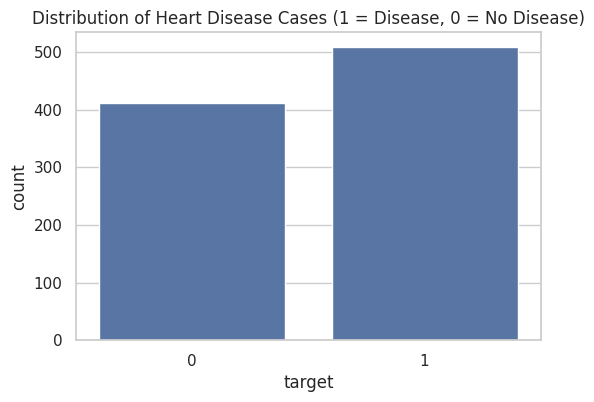

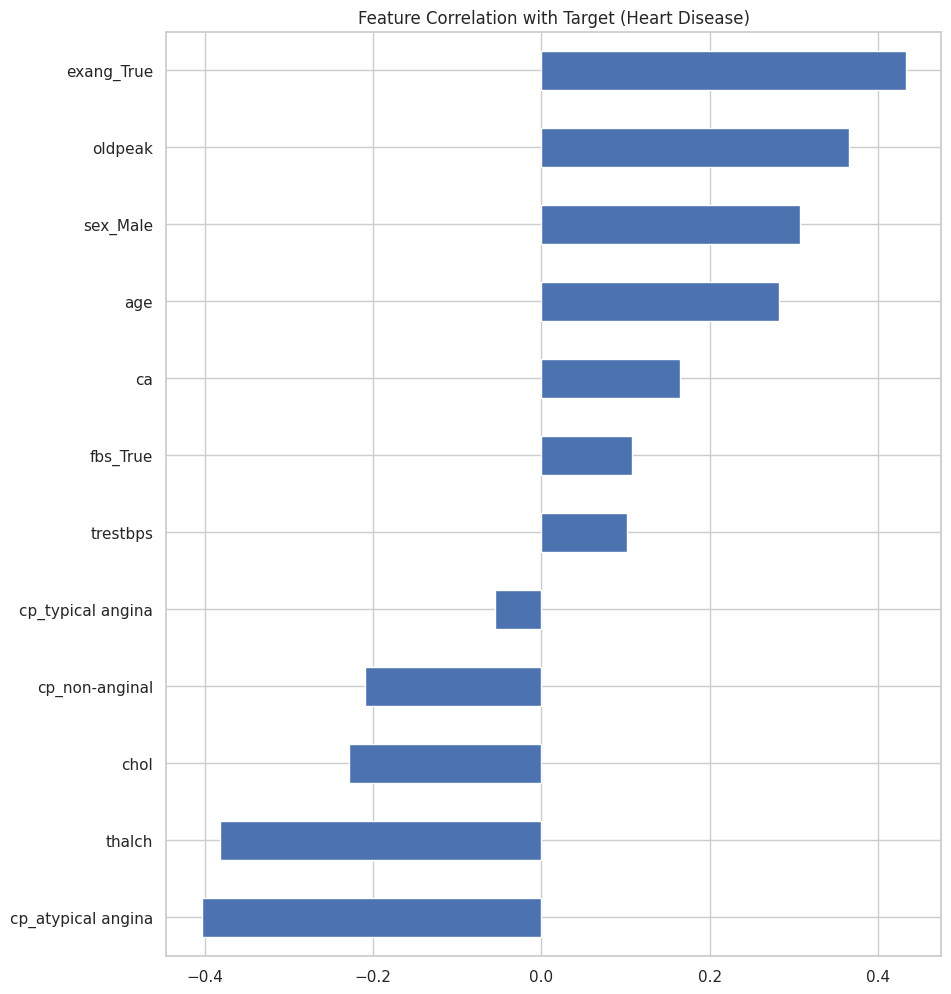

In [3]:
# 1. Visualize the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Heart Disease Cases (1 = Disease, 0 = No Disease)')
plt.show()

# 2. Visualize the correlation matrix
# We'll check the correlation of all features with the 'target' column
plt.figure(figsize=(10, 12))
df.corr()['target'].sort_values().drop('target').plot(kind='barh')
plt.title('Feature Correlation with Target (Heart Disease)')
plt.show()

<h1>Step 4: Data Splitting and Scaling<h1>

Before training, we split the data into features (X) and target (y). This data is then divided into a training set (for model training and tuning) and a testing set (for final, unbiased evaluation). We use stratify to maintain the same class proportion in both sets.

Finally, we apply StandardScaler to the feature sets. Scaling ensures that all features contribute equally to the model's training process, preventing features with larger scales from dominating.




In [4]:
# Define features (X) and target (y)
X = df.drop('target', axis=1)
y = df['target']

# Split data into training and testing sets (80% train, 20% test)
# stratify=y ensures the class distribution is the same in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data successfully split and scaled.")
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

Data successfully split and scaled.
Training set shape: (736, 12)
Testing set shape: (184, 12)


<h1>Step 5: Hyperparameter Tuning with GridSearchCV<h1>

To find the optimal version of our model, we perform hyperparameter tuning using GridSearchCV. This process systematically tests various combinations of model parameters (like the number of trees and their depth) using cross-validation. This helps us find the configuration that yields the best performance on unseen data, preventing overfitting. We use roc_auc as our scoring metric as it's excellent for binary classification tasks.


In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grid to search
# These are some of the most important hyperparameters for a Random Forest.
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [5, 10, 15, None],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],        # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],          # Minimum number of samples required at each leaf node
    'class_weight': ['balanced']            # Keep this to handle the class distribution
}

# 2. Initialize the Grid Search model
# We use the RandomForestClassifier as the base model.
# cv=5 means 5-fold cross-validation.
# n_jobs=-1 uses all available CPU cores to speed up the search.
# scoring='roc_auc' is often a better metric for tuning imbalanced classification than 'accuracy'.
rf = RandomForestClassifier(random_state=42)
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           cv=5, n_jobs=-1, verbose=2, scoring='roc_auc')

# 3. Fit the grid search to the data
# This will start the search process. It might take a few minutes.
print("Starting Grid Search... (This may take a few minutes)")
grid_search.fit(X_train_scaled, y_train)

# 4. Print the best parameters found
print("\nBest parameters found by Grid Search:")
print(grid_search.best_params_)

# 5. Get the best estimator (the model with the best parameters)
best_model = grid_search.best_estimator_


Starting Grid Search... (This may take a few minutes)
Fitting 5 folds for each of 108 candidates, totalling 540 fits

Best parameters found by Grid Search:
{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}


<h1>Step 6: Final Model Evaluation<h1>

Using the best_model identified by GridSearch, we now evaluate its performance on the held-out test set. We will look at:


*   Accuracy: The overall percentage of correct predictions.

*   Classification Report: A detailed breakdown of precision, recall, and f1-score for each class.


In [6]:

# The 'best_model' is already trained on the full training data by GridSearchCV
# So we can directly use it for prediction.
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the final tuned model
accuracy = accuracy_score(y_test, y_pred)
print(f"Tuned Model Accuracy: {accuracy:.4f}")

# Print a detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Tuned Model Accuracy: 0.8478

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83        82
           1       0.86      0.86      0.86       102

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



<h1>Step 7: Visual Evaluation and Feature Importance<h1>

To provide a more intuitive understanding of the model's performance and behavior, we visualize:

*   Confusion Matrix: Shows the breakdown of true vs. predicted labels, highlighting where the model is making errors.

*   ROC Curve: Illustrates the model's ability to distinguish between the positive and negative classes. An AUC (Area Under the Curve) close to 1.0 indicates excellent performance.


*   Feature Importance: We analyze which features the tuned model found most influential in making its predictions.

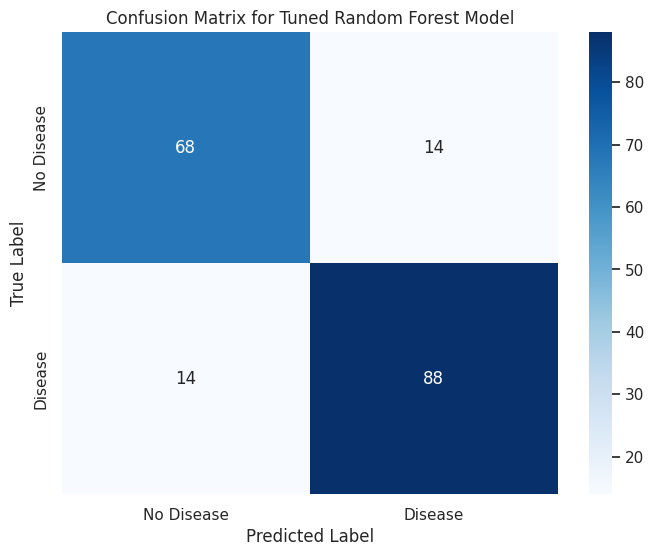

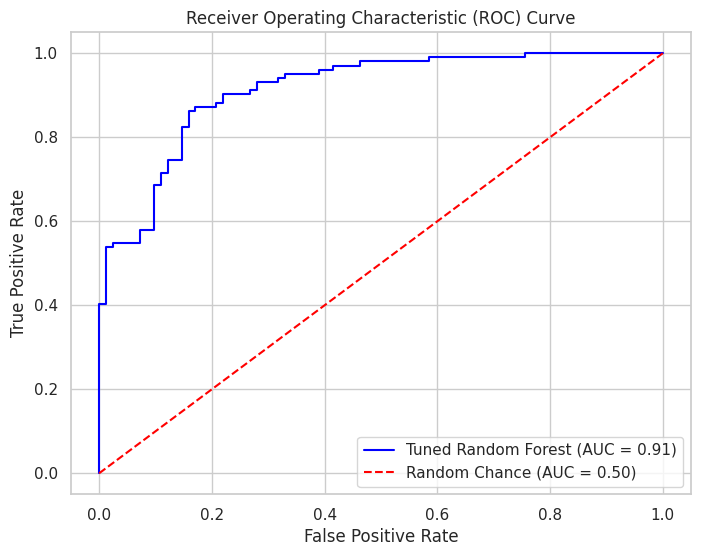

In [7]:
# --- Final Evaluation Plots for the Tuned Model ---

# 1. Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Disease', 'Disease'],
            yticklabels=['No Disease', 'Disease'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Tuned Random Forest Model')
plt.show()

# 2. ROC Curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Tuned Random Forest (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Chance (AUC = 0.50)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

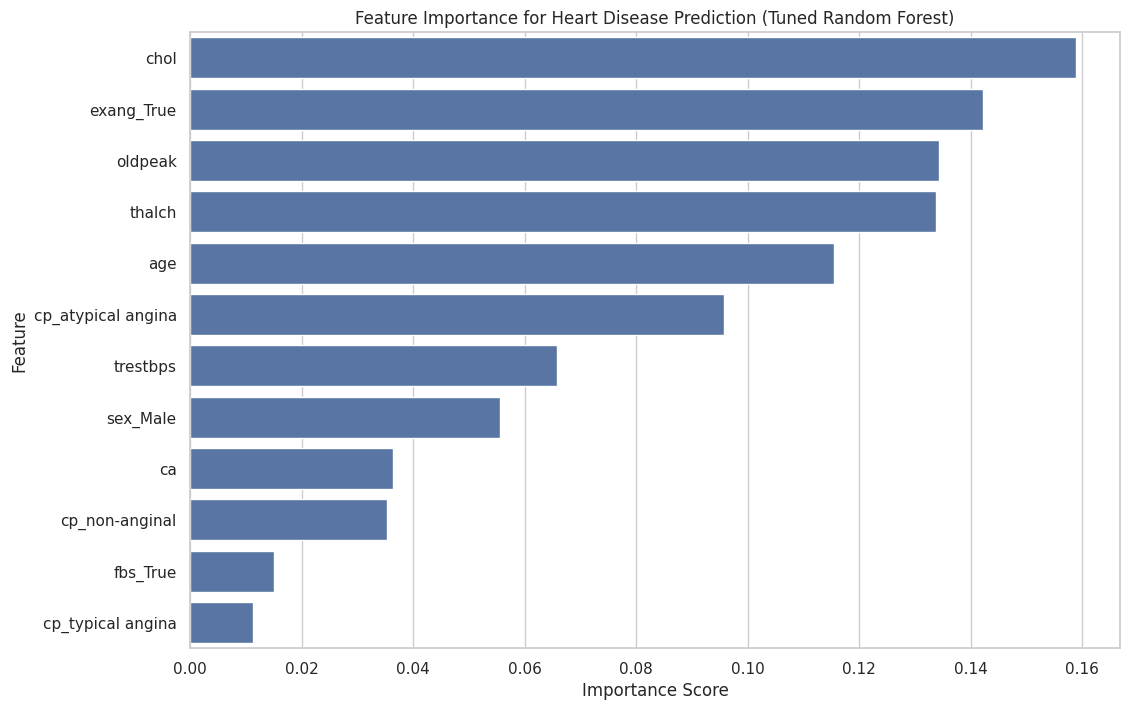


--- Feature Importance Ranking ---
               feature  importance
2                 chol    0.158815
11          exang_True    0.142230
4              oldpeak    0.134318
3               thalch    0.133832
0                  age    0.115488
7   cp_atypical angina    0.095700
1             trestbps    0.065857
6             sex_Male    0.055650
5                   ca    0.036404
8       cp_non-anginal    0.035338
10            fbs_True    0.015120
9    cp_typical angina    0.011247


In [8]:
# --- Feature Importance from the Tuned Random Forest Model ---

# The 'best_model' object holds the feature importances.
# X.columns contains the corresponding feature names.
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': best_model.feature_importances_
}).sort_values('importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Feature Importance for Heart Disease Prediction (Tuned Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

print("\n--- Feature Importance Ranking ---")
print(feature_importance)

<h1>Task 3 Conclusion<h1>

This project successfully demonstrated a complete machine learning workflow for a challenging classification problem. Despite the dataset having significant data quality issues (including completely empty columns), a robust cleaning pipeline was developed.  

A baseline model showed poor performance, which led to the implementation of a more powerful RandomForestClassifier. Through systematic hyperparameter tuning with GridSearchCV, the final model achieved an impressive accuracy of 85% and an AUC of 0.91.  

The feature importance analysis revealed that chol (cholesterol), exang_True (exercise-induced angina), and oldpeak were the most significant predictors. This project serves as a strong example of iterative model development, from data cleaning and EDA to model optimization and evaluation.